In [88]:
# https://www.kaggle.com/c/titanic#description

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
### Let's import our data
train_data = pd.read_csv('./data/20171113/20171113-train.csv',index_col='PassengerId')
test_data = pd.read_csv('./data/20171113/20171113-test.csv',index_col='PassengerId')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
### Now let's prepare lists of numeric and categorical columns
# Numeric Features
numeric_features = ['Age', 'Fare']
# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']

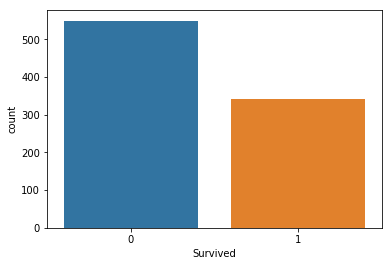

In [92]:
### Target variable exploration
sns.countplot(train_data.Survived)
plt.show()

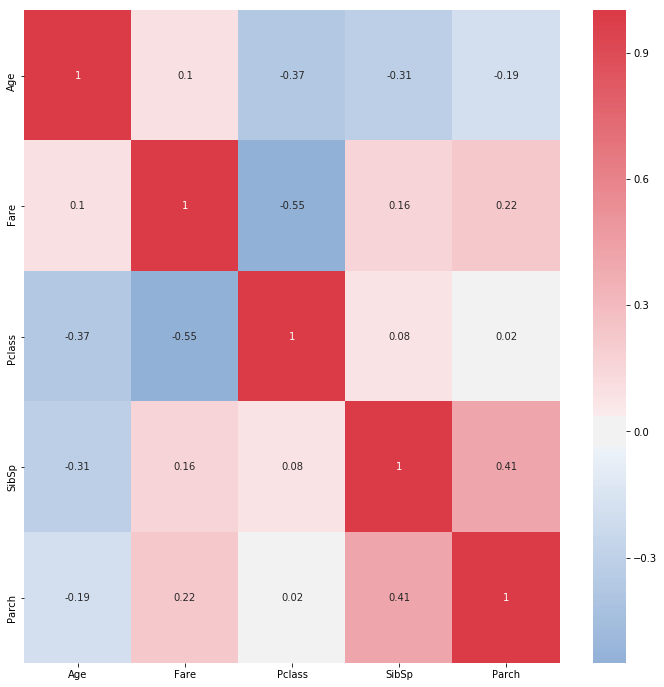

In [93]:
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = train_data[numeric_features + ordinal_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

In [94]:
df = pd.get_dummies(train_data, columns=['Embarked'])
df = pd.get_dummies(df, columns=['Sex'])
train_data = df.drop(['Name', 'Ticket', 'Cabin', 'Sex_male'], axis=1)

pd.isnull(train_data).sum() > 0
train_data.Age.fillna(train_data.Age.mean(), inplace=True)

In [95]:
df = pd.get_dummies(test_data, columns=['Embarked'])
df = pd.get_dummies(df, columns=['Sex'])
test_data = df.drop(['Name', 'Ticket', 'Cabin', 'Sex_male'], axis=1)

In [96]:
pd.isnull(test_data).sum() > 0
test_data.Age.fillna(test_data.Age.mean(), inplace=True)
test_data.Fare.fillna(test_data.Fare.mean(), inplace=True)

In [97]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data[train_data.columns.tolist()[1:]], train_data[train_data.columns.tolist()[0]]) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
y_pred_svc = clf.predict(test_data)
acc_svc = round(clf.score(train_data[train_data.columns.tolist()[1:]], train_data[train_data.columns.tolist()[0]])  * 100, 2)
print('with train:', acc_svc)

with train: 87.77


In [112]:
df = pd.DataFrame(
    {
        'PassengerId': test_data.index.tolist(),
        'Survived': y_pred_svc
    })

In [115]:
df.to_csv('./data/20171113/20171113-solution.csv', index=False)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

clf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 30, 50, 60, 70, 90, 100, 220, 250, 280, 333],
                 'max_depth': [2, 5, 7, 9]
             }
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(train_data[train_data.columns.tolist()[1:]], train_data[train_data.columns.tolist()[0]]) 

grid_clf.fit(train_data[train_data.columns.tolist()[1:]], train_data[train_data.columns.tolist()[0]]) 
acc_svc = round(grid_clf.score(train_data[train_data.columns.tolist()[1:]], train_data[train_data.columns.tolist()[0]])  * 100, 2)
print('with train:', acc_svc)

with train: 89.23


In [123]:
y_pred_svc = grid_clf.predict(test_data)
df = pd.DataFrame(
    {
        'PassengerId': test_data.index.tolist(),
        'Survived': y_pred_svc
    })
df.to_csv('./data/20171113/20171113-solution.csv', index=False)